GITHUB LINK FOR FURTHER INFORMATION ABOUT THE ANALYSIS: "https://github.com/sriharimohan/Machine-Learning-Assignment.git"

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [2]:
df = pd.read_csv("players_20.csv") #READS THE DATA

features = ['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
            'wage_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'] # COLUMNS IN THE DATA

df = df[features].dropna() #DROPS MISSING VALUES

df['is_national_team_level'] = (df['overall'] >= 80).astype(int) #SETTING THE CRITERIA FOR TEAM SELECTION

X = df.drop(['overall', 'is_national_team_level'], axis=1)
y = df['is_national_team_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # SPLITTING DATA FOR TRAINING AND TESTING

model = RandomForestClassifier(n_estimators=100, random_state=42) #MODEL PREPARATION
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9993844259772238

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3132
           1       0.99      0.99      0.99       117

    accuracy                           1.00      3249
   macro avg       1.00      1.00      1.00      3249
weighted avg       1.00      1.00      1.00      3249



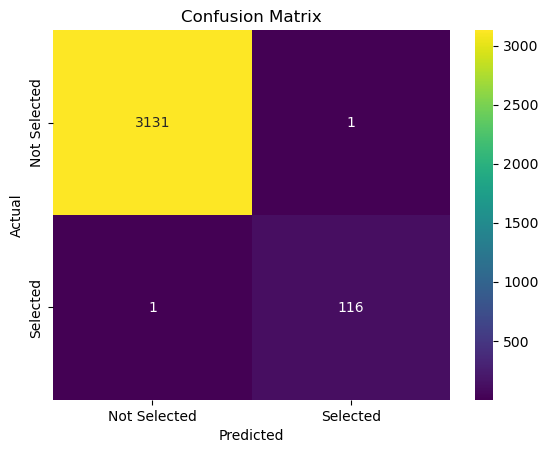

In [35]:
#CONFUSION MATRIX FOR FINDING PREDICTED VS ACTUAL VALUES
conmat = confusion_matrix(y_test, y_pred) # CREATING CONFUSION MATRIX
sns.heatmap(conmat, annot=True, fmt='d', cmap='viridis', xticklabels=["Not Selected", "Selected"], yticklabels=["Not Selected", "Selected"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

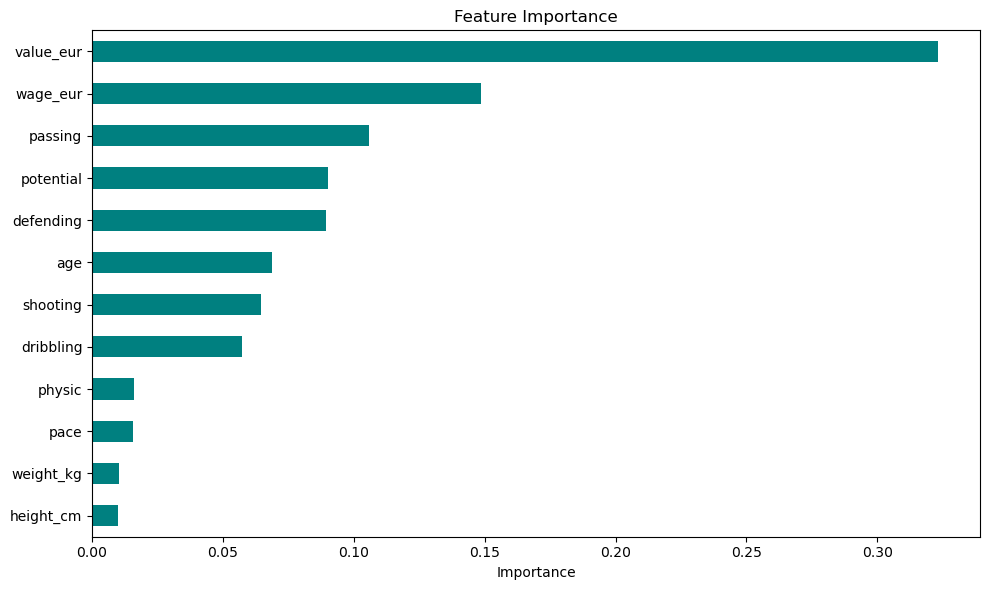

In [69]:
#IMPLEMENTING IMPORTANT FEATURES FOR SELECTION
importances = model.feature_importances_
feat_names = X.columns
imp_df = pd.Series(importances, index=feat_names).sort_values(ascending=True)

#BARPLOT FOR FEATURE IMPORTANCE
imp_df.plot(kind='barh', figsize=(10, 6), title="Feature Importance", color='teal')
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

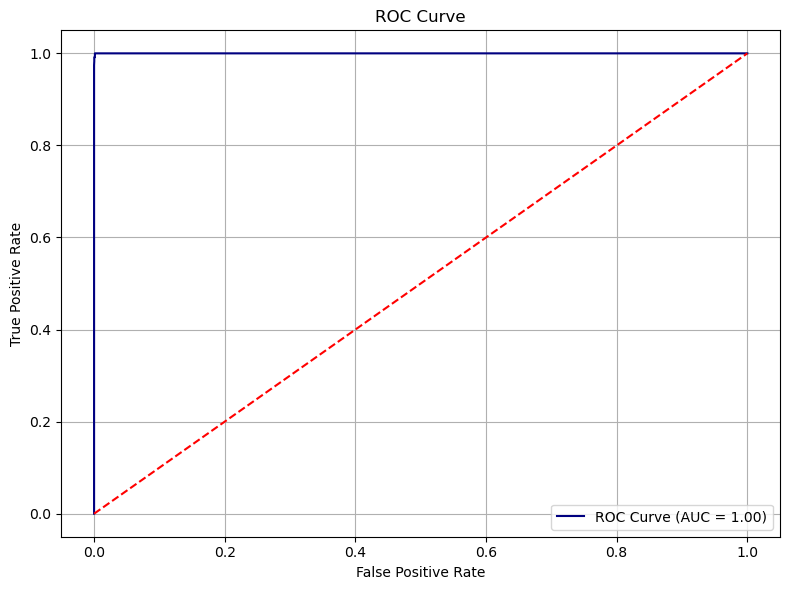

In [53]:
#CREATING THRESHOLD FOR TESTING
y_probs = model.predict_proba(X_test)[:, 1]  # PROBABLITIES FOR CLASS 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

#ROC PLOT TO FIND THE FALSE POSITIVE AND TRUE POSITIVE RATE
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='navy')
plt.plot([0, 1], [0, 1], 'r--')  # RANDOM GUESS LINE
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

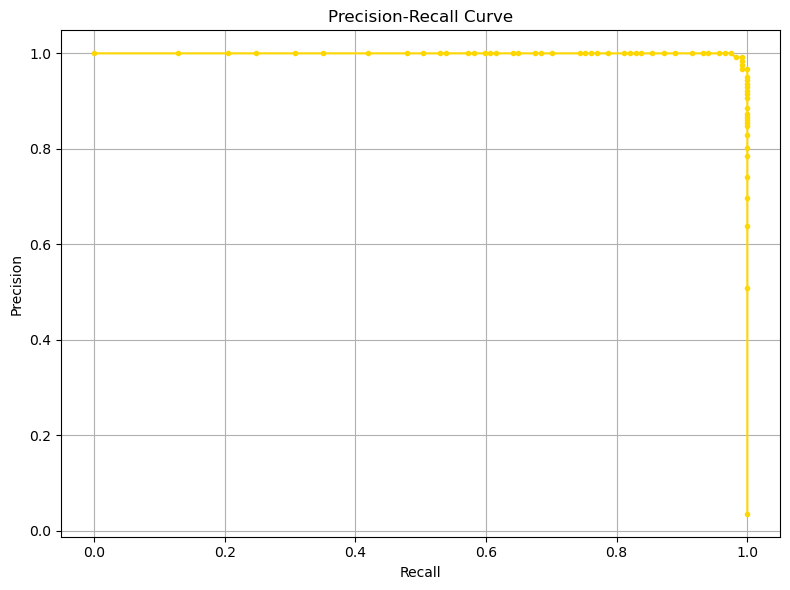

In [55]:
#IMPLEMENTING THW PRECISION AND RECALL VALUES
precision, recall, _ = precision_recall_curve(y_test, y_probs)

#PRECISION RECALL PLOT FOR MODEL EVALUATION
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='gold') #PLOTING PRECISION-RECALL CURVE
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()

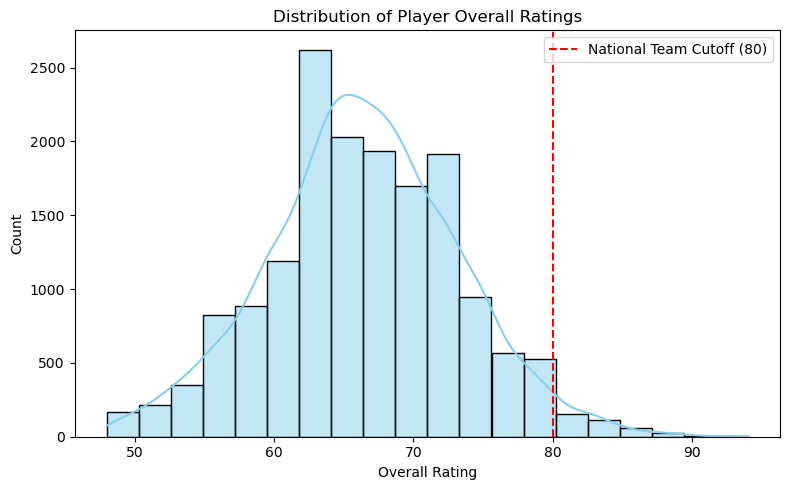

In [78]:
#HISTOGRAM FOR INTERPRETING THE DISTRIBUTION OF PLAYER RATINGS
plt.figure(figsize=(8, 5))
sns.histplot(df['overall'], bins=20, kde=True, color='skyblue')
plt.axvline(80, color='red', linestyle='--', label='National Team Cutoff (80)')
plt.title("Distribution of Player Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\sriha\AppData\Local\Temp\ipykernel_2456\383243870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_national_team_level', palette='viridis')


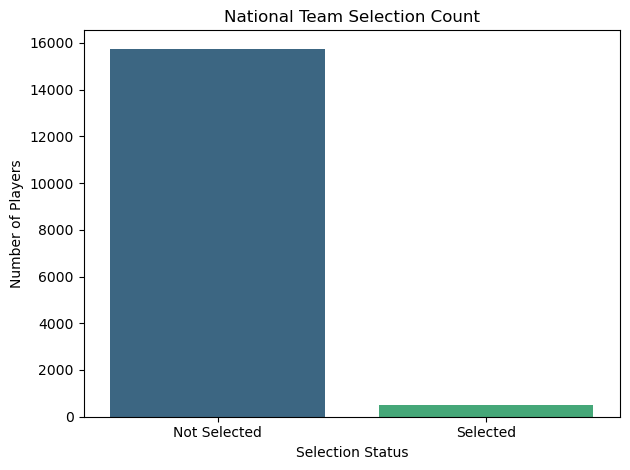

In [105]:
#COUNT PLOT FOR FINDING THE SELECTION STATUS OF PLAYERS
sns.countplot(data=df, x='is_national_team_level', palette='viridis')
plt.xticks([0, 1], ['Not Selected', 'Selected'])
plt.title("National Team Selection Count")
plt.xlabel("Selection Status")
plt.ylabel("Number of Players")
plt.tight_layout()
plt.show()

Text(0.5, 1.02, 'Feature Relationships (National Team vs Not)')

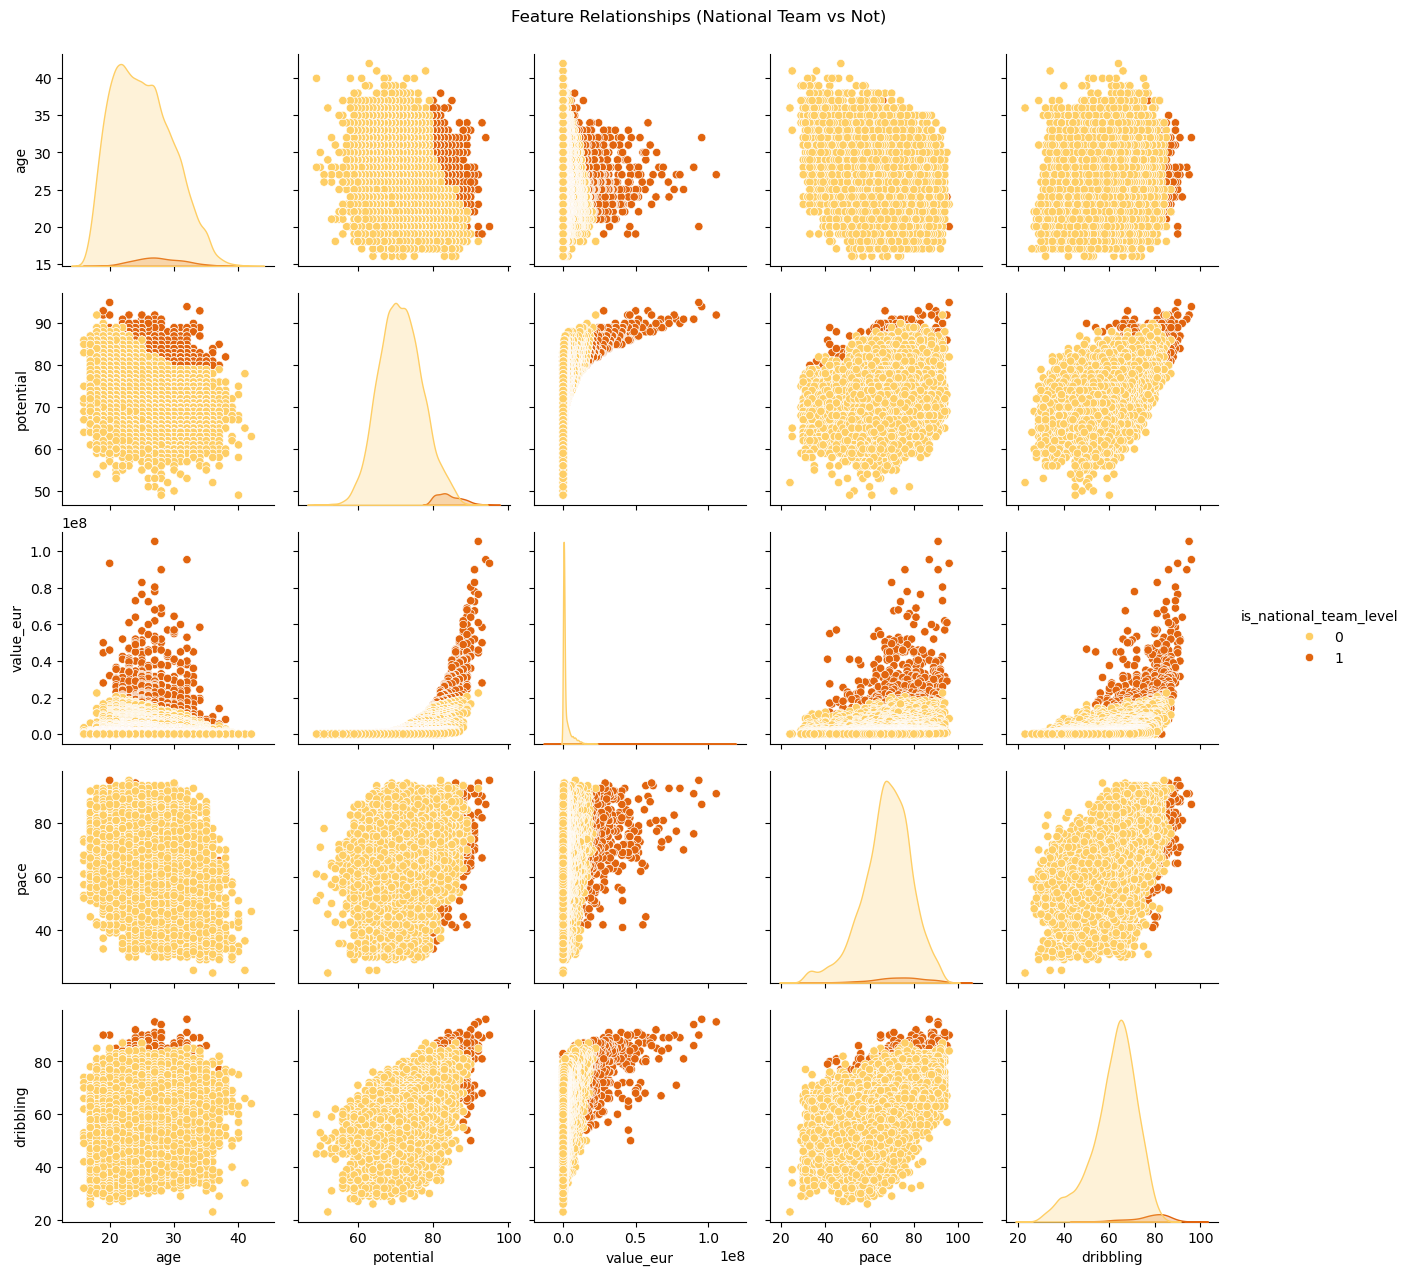

In [77]:
#PAIR PLOT FOR EVALUATING THE RELATION BETWEEN SELECTED AND NON-SELECTED PLAYERS WITH VARIABLES
sns.pairplot(df[['age', 'potential', 'value_eur', 'pace', 'dribbling', 'is_national_team_level']],
             hue='is_national_team_level', palette='YlOrBr')
plt.suptitle("Feature Relationships (National Team vs Not)", y=1.02)